In [9]:
import pandas as pd
import numpy as np
import os.path
from sklearn import metrics
import matplotlib.pyplot as plt

Take a easily classifiable compound. Mix them with DMSO and plot on PCA or UMAP
Do the same thing with badly identifiable Compound!

In [2]:
# Top compounds for prediction:
c = ['BRD-K99113996-001-02-0', 'BRD-K95901403-001-04-5',
       'BRD-K72414522-001-06-7', 'BRD-K61195623-001-01-4',
       'BRD-K61691541-001-01-1', 'BRD-K19687926-379-07-4',
       'BRD-A33280134-001-04-7', 'BRD-K86882815-001-03-2',
       'BRD-K57169635-001-04-5', 'BRD-K87909389-003-03-4',]
bottom = ['BRD-K92731339-227-04-9', 'BRD-K93208532-001-02-5',
       'BRD-A97674275-001-11-8', 'BRD-K51485625-001-08-4',
       'BRD-K74339692-001-01-9', 'BRD-A97104540-004-15-0',
       'BRD-K95880107-001-02-4', 'BRD-K97158071-001-18-1',
       'BRD-K97181089-003-24-7', 'BRD-K79595931-312-01-3']
# c = sort[:10].index.to_list()
c.append('DMSO')

In [10]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/819/819_aggregated_median.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df = df[df['Metadata_broad_sample'].isin(c)]

In [12]:
from sklearn.decomposition import PCA
df.Metadata_broad_sample.value_counts()

DMSO                      3251
BRD-K87909389-003-03-4       5
BRD-A33280134-001-04-7       5
BRD-K61691541-001-01-1       5
BRD-K57169635-001-04-5       5
BRD-K19687926-379-07-4       5
BRD-K86882815-001-03-2       5
BRD-K72414522-001-06-7       5
BRD-K95901403-001-04-5       5
BRD-K99113996-001-02-0       5
BRD-K61195623-001-01-4       5
Name: Metadata_broad_sample, dtype: int64

Explained variation per principal component: [0.06414899 0.04999811 0.04719665]


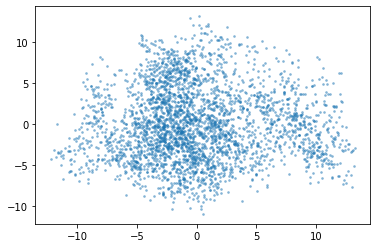

In [13]:
features = [f for f in df.columns if f.startswith('eff')]
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[features].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.style.use({'figure.facecolor':'white'})
plt.scatter(df['pca-one'], df['pca-two'], s = 3, alpha= 0.4)
plt.show()


In [14]:
def is_dmso(sample):
    if sample == 'DMSO':
        return 0.8
    else:
        return 0

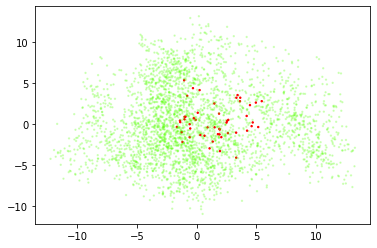

In [15]:
df = df.sample(frac=1).reset_index(drop=True)
df['color'] = df.Metadata_broad_sample.apply(is_dmso)
plt.style.use({'figure.facecolor':'white'})
plt.scatter(df['pca-one'], df['pca-two'], c = df['color'], marker= 'o', s = 2, alpha= 1- df['color'], cmap = 'prism')
plt.show()

In [16]:
# try umap
import umap
reducer = umap.UMAP()

In [17]:
embedding = reducer.fit_transform(df[features])
embedding.shape

(3301, 2)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

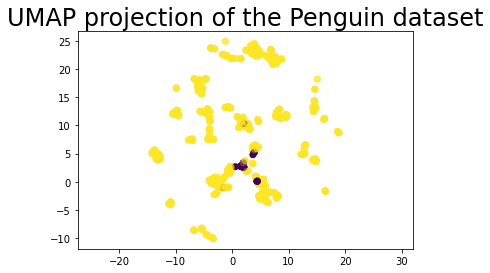

In [18]:
df['color'] = df.Metadata_broad_sample.apply(is_dmso)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = df['color'],
alpha= 1- df['color'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

In [19]:
# Do the same things above but with spherized data.
# df = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/819/819_aggregated_median.csv')
features = [f for f in df.columns if f.startswith('eff')]
from pycytominer import aggregate, normalize
sphere = normalize(
    profiles=df,
    features=features,
    samples="Metadata_broad_sample == 'DMSO'",
    method='spherize',
    output_file='none'
)


Explained variation per principal component: [0.08827497 0.0475594  0.0345471 ]


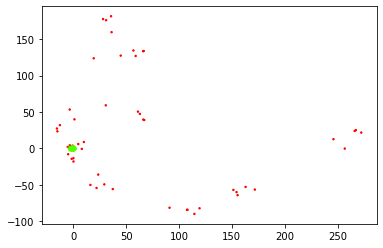

In [20]:
sphere = sphere.sample(frac=1).reset_index(drop=True)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(sphere[features].values)
sphere['pca-one'] = pca_result[:,0]
sphere['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sphere['color'] = sphere.Metadata_broad_sample.apply(is_dmso)
plt.style.use({'figure.facecolor':'white'})
plt.scatter(sphere['pca-one'], sphere['pca-two'], c = sphere['color'], marker= 'o', s = 2, alpha= 1- sphere['color'], cmap = 'prism')
plt.show()
